In [1]:
from music21 import *

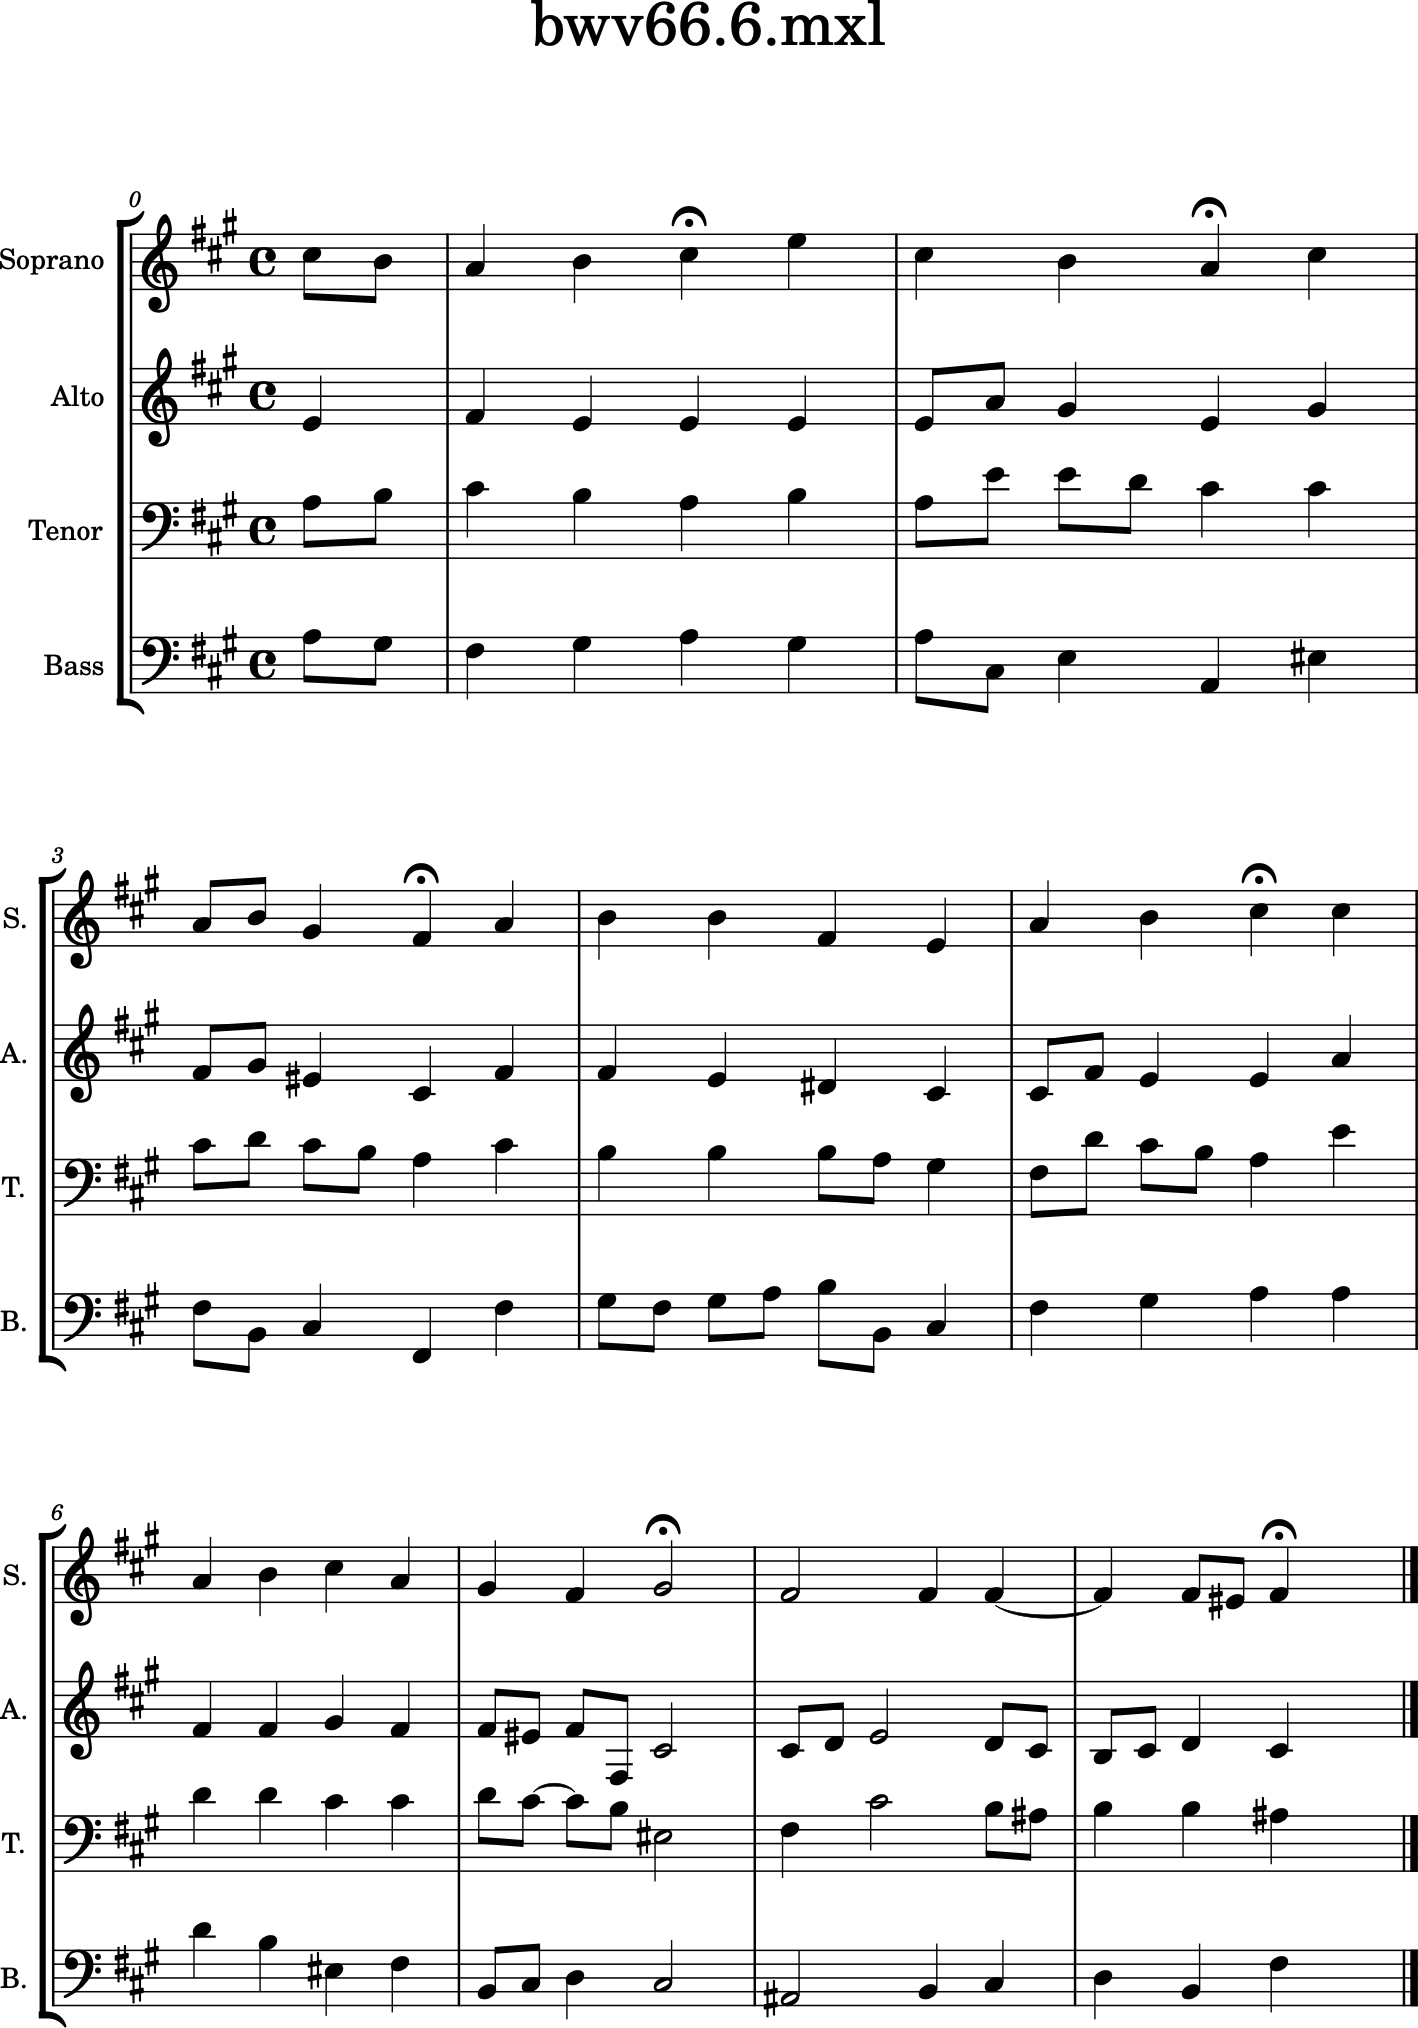

In [2]:
b = corpus.parse('bwv66.6')
b.show()

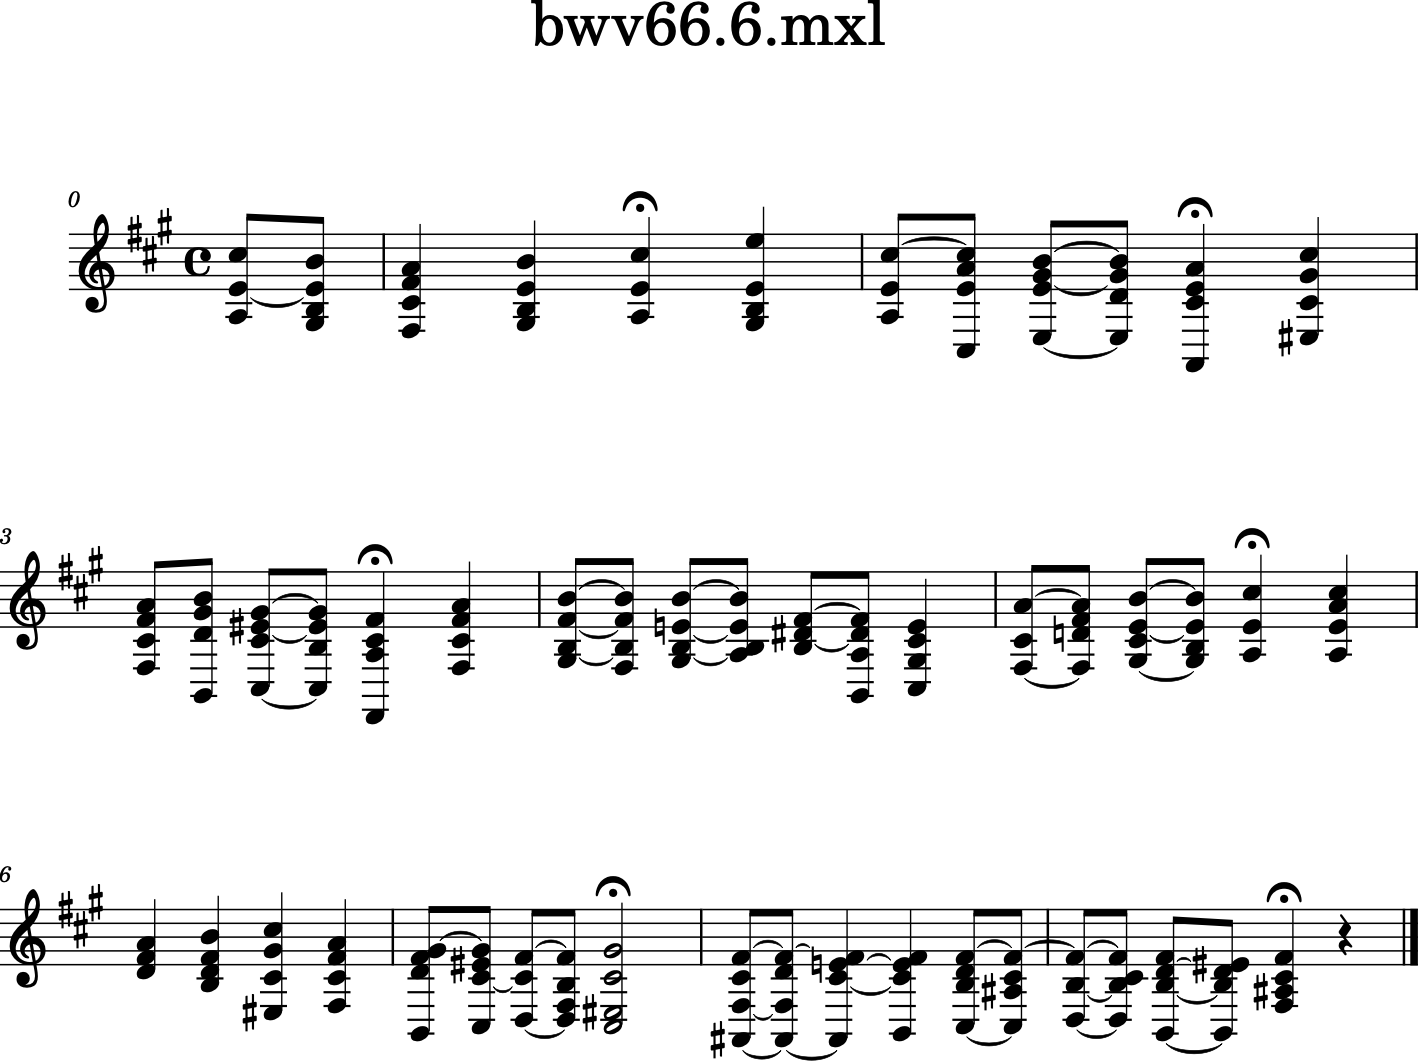

In [3]:
bChords = b.chordify()
bChords.show()

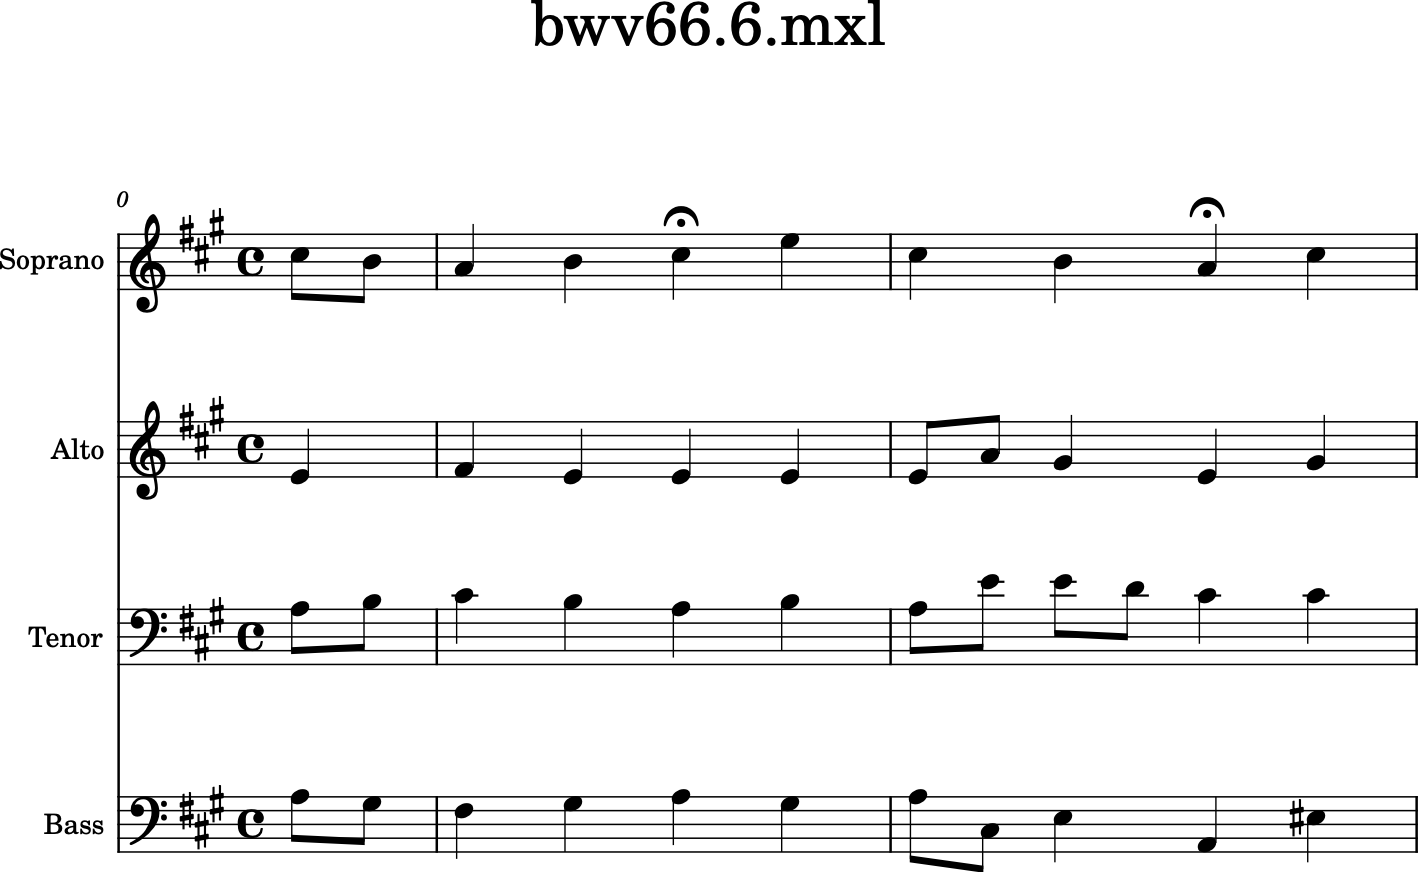

In [4]:
for c in bChords.recurse().getElementsByClass(chord.Chord):
    c.closedPosition(forceOctave=4, inPlace=True)

b.measures(0, 2).show()

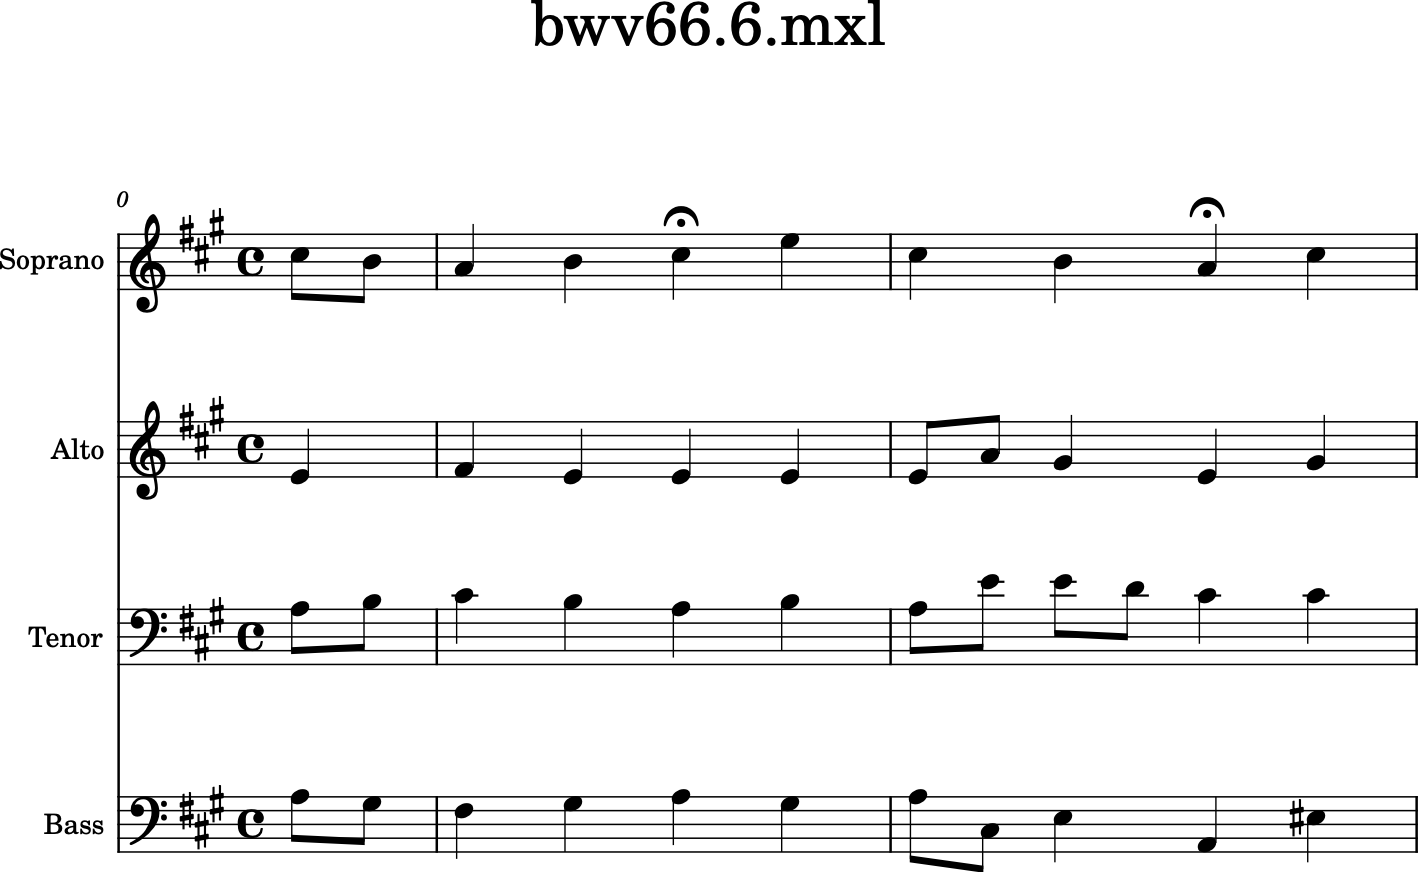

In [5]:
for c in bChords.recurse().getElementsByClass(chord.Chord):
    rn = roman.romanNumeralFromChord(c, key.Key('A'))
    c.addLyric(str(rn.figure))

b.measures(0, 2).show()